## Import the image

/home/brunodegan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  app.launch_new_instance()


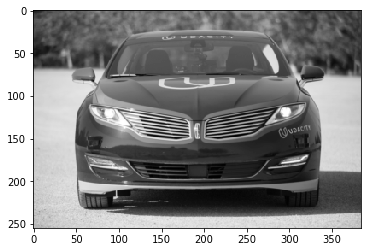

In [7]:
import cv2
import scipy as imgResize
from ipykernel import kernelapp as app
import matplotlib.pyplot as plt
%matplotlib inline

# TODO: Feel free to try out your own images here by changing img_path
# to a file path to another image on your computer!
img_path = 'images/image.png'

# load color image 
bgr_img = cv2.imread(img_path)
# convert to grayscale
gray_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2GRAY)
# resize to smaller
small_img = imgResize.misc.imresize(gray_img, 0.3)

# rescale entries to lie in [0,1]
small_img = small_img.astype("float32")/255

# plot image
plt.imshow(small_img, cmap='gray')
plt.show()

## Specify filter

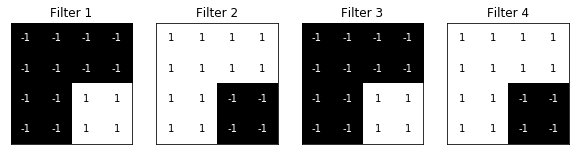

In [8]:

import numpy as np

# TODO: Feel free to modify the numbers here, to try out another filter!
# Please don't change the size of the array ~ :D
filter_vals = np.array([[-1, -1, -1, -1], 
                        [-1, -1, -1, -1], 
                        [-1, -1, 1, 1],
                        [-1, -1, 1, 1]])

### do not modify the code below this line ###

# define four filters
filter_1 = filter_vals
filter_2 = -filter_1
filter_3 = filter_1.T
filter_4 = -filter_3

filters = [filter_1, filter_2, filter_3, filter_4]

# visualize all filters
fig = plt.figure(figsize=(10, 5))
for i in range(4):
    ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
    
    ax.imshow(filters[i], cmap='gray')

    ax.set_title('Filter %s' % str(i+1))
    
    width, height = filters[i].shape
    
    for x in range(width):
        for y in range(height):
            ax.annotate(str(filters[i][x][y]), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if filters[i][x][y]<0 else 'black')

# Visualize the activation maps for each filter

/home/brunodegan/.local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


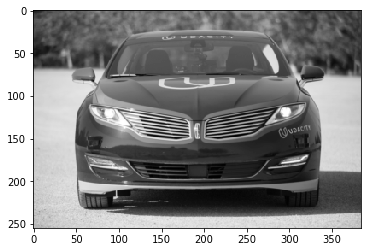

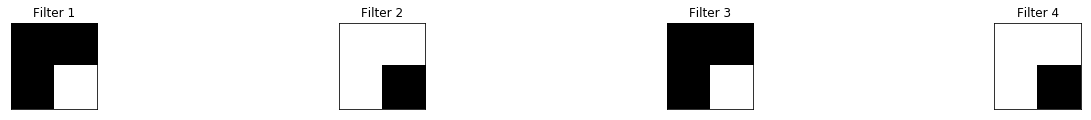

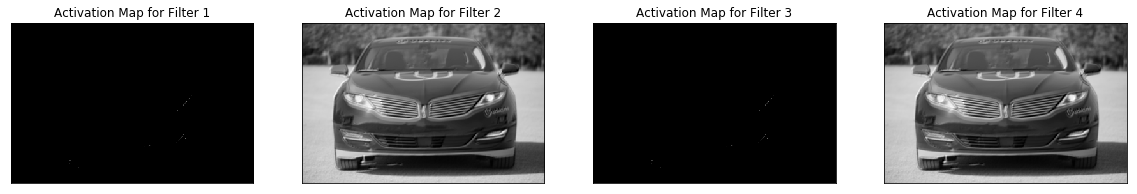

In [25]:
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D
import matplotlib.cm as cm

# plot image
plt.imshow(small_img, cmap='gray')

# define a neural network with a single convolutional layer with one filter
model = Sequential()
model.add(Convolution2D(1, (4, 4), activation='relu', input_shape=(small_img.shape[0], small_img.shape[1], 1)))

# apply convolutional filter and return output
def apply_filter(img, index, filter_list, ax):
    # set the weights of the filter in the convolutional layer to filter_list[i]
    model.layers[0].set_weights([np.reshape(filter_list[i], (4,4,1,1)), np.array([0])])
    # plot the corresponding activation map
    ax.imshow(np.squeeze(model.predict(np.reshape(img, (1, img.shape[0], img.shape[1], 1)))), cmap='gray')

# visualize all filters
fig = plt.figure(figsize=(12, 6))
fig.subplots_adjust(left=0, right=1.5, bottom=0.8, top=1, hspace=0.05, wspace=0.05)
for i in range(4):
    ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
    ax.imshow(filters[i], cmap='gray')
    ax.set_title('Filter %s' % str(i+1))

# visualize all activation maps
fig = plt.figure(figsize=(20, 20))
for i in range(4):
    ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
    apply_filter(small_img, i, filters, ax)
    ax.set_title('Activation Map for Filter %s' % str(i+1))

In [26]:
from keras.layers import Conv2D

In [27]:
# Conv2D(filters, kernel_size, strides, padding, activation='relu', input_shape)

Digamos que eu esteja construindo uma CNN e minha camada de entrada 
aceite imagens em níveis de cinza de 200 por 200 pixels 
(correspondentes a um arranjo 3D de altura 200, largura 200 e profundidade 1). 
Então, digamos que eu gostaria que a próxima camada fosse uma camada convolucional com 16 filtros, 
cada um com altura e largura de 2. Quando estiver realizando a convolução, gostaria 
que o filtro pulasse dois pixels por vez. Também não gostaria que o filtro fosse aplicado 
fora dos limites da imagem; em outras palavras, não quero preencher a imagem com zeros. 
Então, para construir esta camada convolucional, eu usaria a seguinte linha de código

In [30]:
#Conv2D(filters=16, kernel_size=2, strides=2, activation='relu', input_shape=(200, 200, 1))


Digamos que eu gostaria que a próxima camada na minha 
CNN fosse uma camada convolucional que receberá a camada construída no exemplo 1 como entrada.
Digamos que eu gostaria que minha nova camada tivesse 32 filtros, cada um com altura e largura de 3.
Quando estiver realizando a convolução, gostaria que o filtro pulasse 1 pixel por vez.
Eu quero que a camada convolucional veja todas as regiões da camada anterior, 
então, não me importo se o filtro se estender além da borda da camada anterior quando 
estiver realizando a convolução. 
Então, para construir esta camada convolucional, eu usaria a seguinte linha de código:

In [ ]:
#Conv2D(filters=32, kernel_size=3, strides=1, activation='relu', padding='same', input_shape=(200,200,1))

# Max Polling

In [31]:
from keras.layers import MaxPooling2D

In [32]:
from keras.models import Sequential
from keras.layers import MaxPooling2D

model = Sequential()
model.add(MaxPooling2D(pool_size=2, strides=2, input_shape=(100, 100, 15)))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 15)        0         
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


In [35]:
from keras.layers import Flatten, Dense

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dense(10, activation='softmax'))